# Hands-on Machine Learning - Final Project

### Group: WANG Xi, REN Jiren, NGUYEN Dang Hoang Khang 

### 1. Intro

#### Context

In astronomy, stellar classification refers to the categorization of stars based on their spectral characteristics. The classification of stars, galaxies, and quasars is one of the most fundamental schemes in the field. Early cataloging of stars and their distribution in the sky led to the understanding that they constitute our own galaxy. Later, the distinction that Andromeda was a separate galaxy from our own prompted surveys of numerous galaxies as more powerful telescopes were developed.

#### Scope

We would like to know how we could classify galaxies, quasars and stars using their spectral characteristics as well as other possibly available features.

#### Data
fedesoriano. (January 2022). Stellar Classification Dataset - SDSS17. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17.

### 2. Preprocessing

In [1]:
import platform
from pathlib import Path
import pandas as pd

#### 2.1 Data loading

In [2]:
DATA = Path("../Stellar/data")    # Change to your data folder
assert DATA.exists()

In [3]:
star_raw_df = pd.read_csv(DATA / "star_classification.csv", low_memory=False)

We have a quick look at some data at the top to have a better understanding about the dataset

In [4]:
star_raw_df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


We use df.info() method to view a quick description of the data:
- There are **100000** observations made by SDSS, each observation is described using **18 features**
- All **17 non-target features** are numerical value, and there is the **target feature** is "class" which we are trying to classify
- There are **no NaN** values in the dataset

In [5]:
star_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

#### 2.2 Data analysis

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

First, we use **df.describe()** to generate the basic statistics of the dataset. We observe that the features have **different scales**, which could affect the performance of the classification model. Additionally, we notice that the minimum values in the **u**, **g**, and **z** columns strongly deviate from the mean and median, suggesting that these might be noisy data resulting from measurement errors.

In [7]:
star_raw_df.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


We visualize and study the characteristics of each features, excluding the **obj_ID** and **class**. There are two most distinctive features we observe in the visualization:
- Most features are not distinctly separable by eye, except for the **redshift** feature.
- There are distinct outlier values in the **u**, **g**, and **z** columns. This confirm our assumption made in earlier study

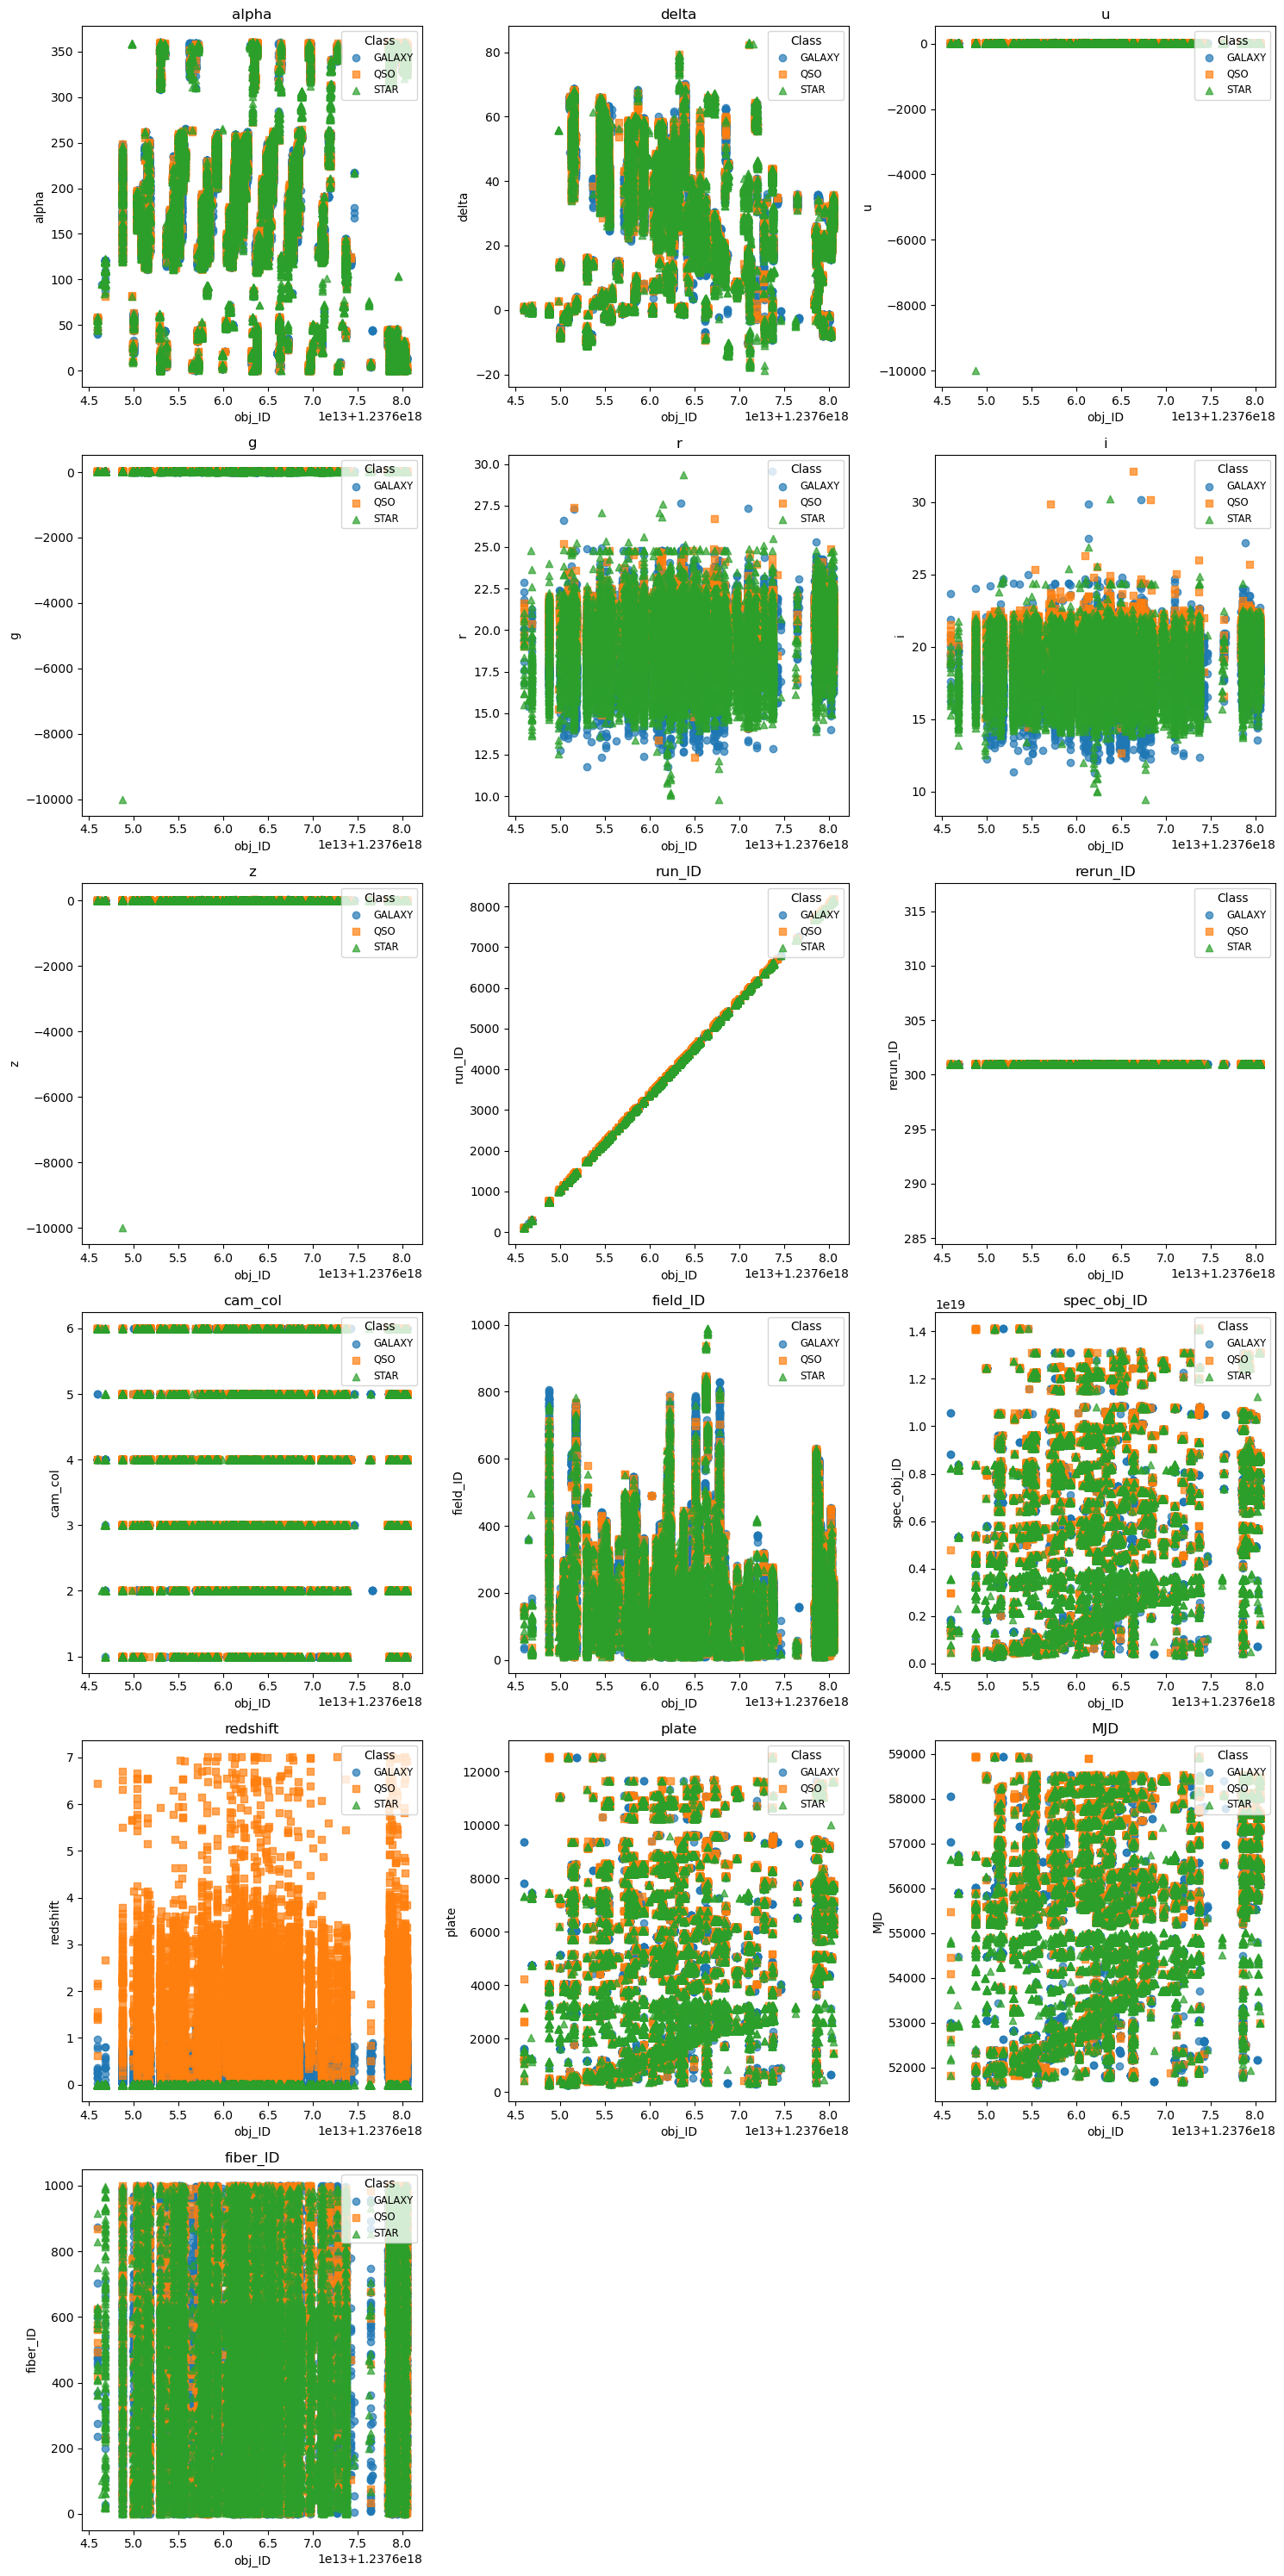

In [8]:
# List of features excluding 'obj_ID' and 'class'
features = [feature for feature in star_raw_df.columns if feature not in ('obj_ID', 'class')]
num_features = len(features)

# Plot setting
rows = (num_features + 2) // 3
cols = min(3, num_features)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()
classes = star_raw_df['class'].unique()
colors = plt.cm.tab10(range(len(classes)))
markers = ['o', 's', '^', 'P', 'D', '*', 'X', 'v']

# Loop through features and plot by class
for i, feature in enumerate(features):
    for j, class_label in enumerate(classes):
        class_mask = star_raw_df['class'] == class_label
        axes[i].scatter(
            star_raw_df.loc[class_mask, 'obj_ID'],
            star_raw_df.loc[class_mask, feature],
            label=class_label,
            alpha=0.7,
            color=colors[j % len(colors)],
            marker=markers[j % len(markers)]
        )
    axes[i].set_xlabel('obj_ID')
    axes[i].set_ylabel(feature)
    axes[i].set_title(feature)
    axes[i].legend(title='Class', fontsize='small', loc='upper right')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Next, we study the correlations between attributes by plotting the correlation matrix with seaborn. We only study correlations between spectral features and ignore the metadata

- High correlation among optical bands (u, g, r, i, z) indicates redundancy among these features which could negatively affect the performance of some models due to overlapping information
- Right Ascension (alpha) and Declination (delta) angle show very weak correlations with other features
- Particularly, redshift has moderate correlations with the g, r, i, and z bands. Since redshift is astrophysically significant, this feature likely plays an important role in classification

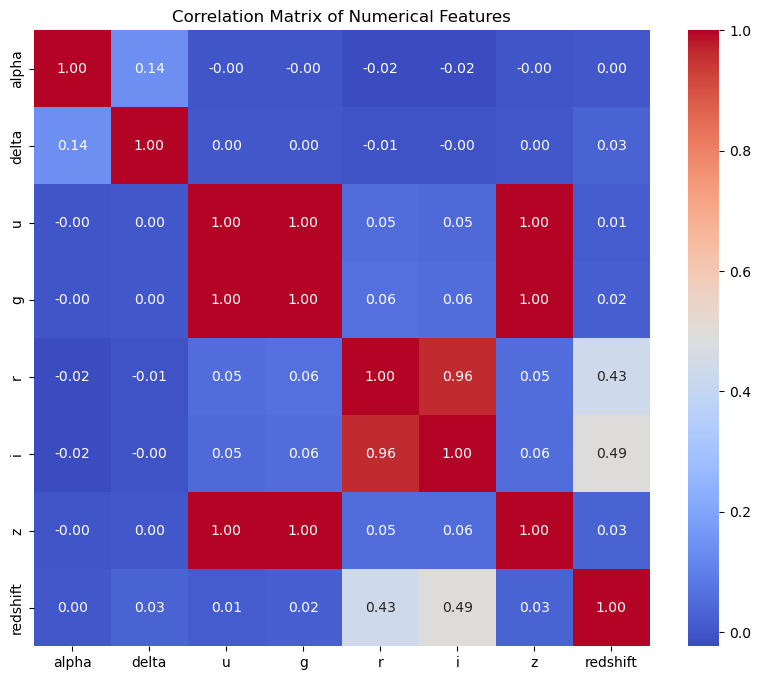

In [9]:
# Correlation matrix
spectral_features = star_raw_df.drop(["obj_ID", "run_ID", "rerun_ID", "cam_col", "field_ID", "spec_obj_ID", "class", "plate", "MJD", "fiber_ID"], axis=1)
correlation_matrix = spectral_features.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Then, we visualize the dataset using t-SNE for observing the clustering:
- The blue points (Galaxy) are clustered in the central area and occupy a large portion of the space. This could indicate that the galaxies share similar characteristics within the dimensions used.
- The yellow (Star) and turquoise (QSO) points are also clearly visible but less concentrated, and seem to blend somewhat with the other classes. This could suggest that stars and QSOs have overlapping features in the t-SNE plane.
- While t-SNE helps visualize local relationships and clustering, the separation between classes is not perfect, suggesting that the 2D representation does not fully capture the complex distinctions between different classes.


[0 1 2]
Dimensions of X : (100000, 2)
Dimensions of y_encoded : (100000,)


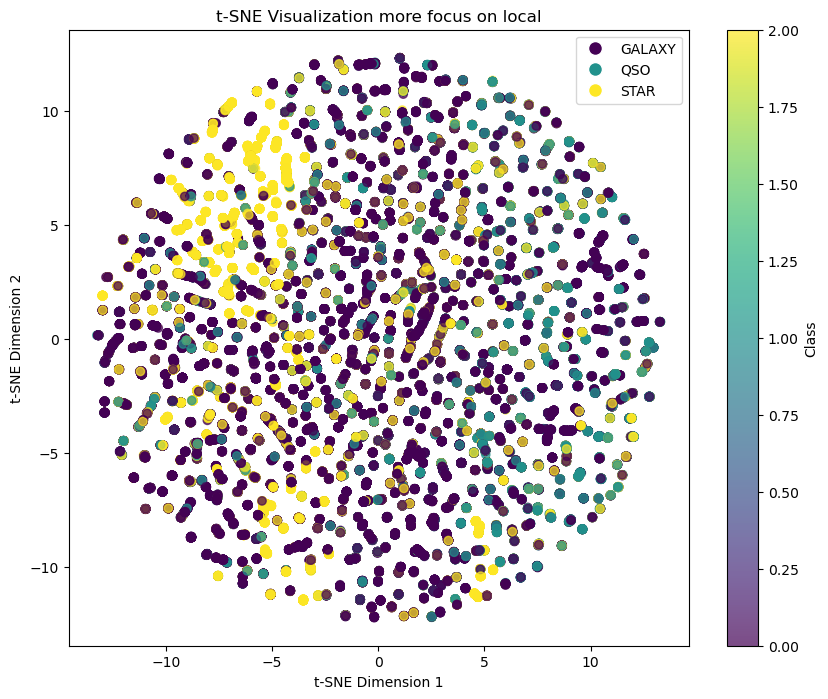

In [10]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np

id_columns = [col for col in star_raw_df.columns if 'id' in col.lower()]
star_df_cleaned = star_raw_df.drop(columns=id_columns)

X = star_df_cleaned.drop(columns=['class'])
y = star_df_cleaned['class']

# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=25, n_iter=250)
X_tsne = tsne.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Print details
print(np.unique(y_encoded))
print("Dimensions of X :", X_tsne.shape)
print("Dimensions of y_encoded :", y_encoded.shape)

# Visualization
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_encoded, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Class")
plt.title("t-SNE Visualization more focus on local")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")

# Create legend dynamically from the LabelEncoder
handles = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(i)), markersize=10, label=label)
    for i, label in enumerate(label_encoder.classes_)
]
plt.legend(handles=handles, loc='upper right')
plt.show()


Finally, we examine the class dsitribution that we are trying to classify:
- The **Galaxy** class constitutes the majority, accounting for nearly 60% of the dataset.
- The **Quasar** and **Star** classes each make up approximately 20% of the dataset.

Based on this, we observe a class imbalance in the dataset, which could potentially affect the performance of certain classification models.

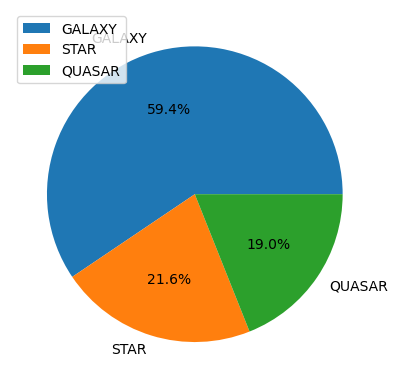

In [11]:
plt.pie(star_raw_df['class'].value_counts(),autopct="%1.1f%%",labels=['GALAXY','STAR','QUASAR']);
plt.legend()

#### 2.3 Data cleaning

Remove NaN values and outlier values. 
- Since there are no NaN values, so we don't have to take care of it.
- We will remove the oulier observed in the statistics report and visualization of **u**, **g**, and **z** column


In [12]:
print(f"Index of the outlier in u column: {np.argmin(star_raw_df['u'])}")
print(f"Index of the outlier in g column: {np.argmin(star_raw_df['g'])}")
print(f"Index of the outlier in z column: {np.argmin(star_raw_df['z'])}")

Index of the outlier in u column: 79543
Index of the outlier in g column: 79543
Index of the outlier in z column: 79543


Since the outlier belong to a single sample, so we only have to remove one observation. The dataset has remaining 99999 observations

In [13]:
star_raw_df.drop(np.argmin(star_raw_df['u']), inplace=True)

### 3. Training

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#### 3.1 Feature selection

We decide to drop "obj_ID", "run_ID", "rereun_ID", and "spec_obj_ID" because they are irrelevant metadata for the classification task.

In [15]:
star_df = star_raw_df.drop(["spec_obj_ID", "obj_ID", "run_ID"], axis=1)

#### 3.2 Feature encoding

We perform label encoding for the galaxy, quasar, and star classes to ensure consistency throughout the report:
- Galaxies are encoded as class 0
- Quasars are encoded as class 1
- Stars are encoded as class 2

In [16]:
label_pre = LabelEncoder()
star_df['class'] = label_pre.fit_transform(star_df['class'])
star_df.head()

,alpha,delta,u,g,r,i,z,rerun_ID,cam_col,field_ID,class,redshift,plate,MJD,fiber_ID
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,301,2,79,0,0.634794,5812,56354,171
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,301,5,119,0,0.779136,10445,58158,427
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,301,2,120,0,0.644195,4576,55592,299
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,301,3,214,0,0.932346,9149,58039,775
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,301,3,137,0,0.116123,6121,56187,842


#### 3.3 Splitting the dataset

In [17]:
# Split
train_df, test_df = train_test_split(star_df, test_size=0.2, random_state=42)

print("train_df: ", train_df.shape)
print("test_df: ", test_df.shape, "\n")

features = star_df.columns.drop("class").tolist()
target = "class"

X_train = train_df[features].values
y_train = train_df[target].values

X_test = test_df[features].values
y_test = test_df[target].values

train_df:  (79999, 15)
test_df:  (20000, 15) 



#### 3.4 Base Model

The initial approach is to apply three base models with default parameters for the classification task. The selected models are:
1. Logistic Regression
2. Random Forest
3. K-Nearest Neighbors

The choice of models comes after experimenting with multiple classification algorithms and analyzing the errors produced by each. These three models were selected because they generate different types of errors, which are useful for analysis. Detailed error analysis and feature importance will be discussed after training and testing.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

For the selection of performance metrics, we note the presence of class imbalance in the dataset. As a result, simply calculating overall metrics such as accuracy, precision, F1-score, or recall is insufficient. Therefore, we use the **classification_report** by sklearn and **confusion matrix** to provide a more detailed analysis of each model's performance and the errors they produce.

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

##### 3.4.1. Logistic Regression - base model

In [20]:
# Defining and training the model
base_model_lr = LogisticRegression(random_state=42)
base_model_lr.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

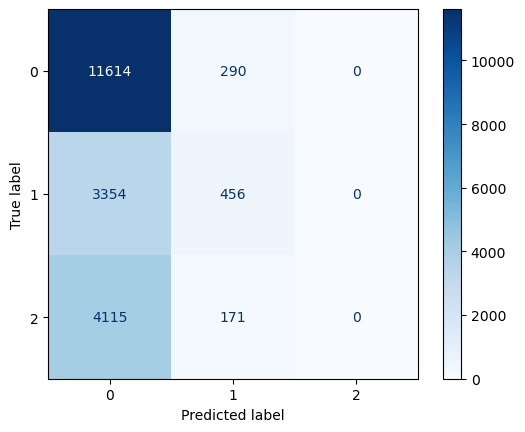

In [21]:
# Confusion matrix for Logistic Regression - base model
y_test_pred = base_model_lr.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

In [22]:
# Classification report for Logistic Regression - base model
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.61      0.98      0.75     11904
           1       0.50      0.12      0.19      3810
           2       0.00      0.00      0.00      4286

    accuracy                           0.60     20000
   macro avg       0.37      0.37      0.31     20000
weighted avg       0.46      0.60      0.48     20000



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Because the metrics are too low, we decide to analyze the model on the training set to see if it is underfitting

In [23]:
y_train_pred = base_model_lr.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.61      0.98      0.75     47541
           1       0.50      0.12      0.19     15151
           2       0.00      0.00      0.00     17307

    accuracy                           0.60     79999
   macro avg       0.37      0.36      0.31     79999
weighted avg       0.45      0.60      0.48     79999



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Error analysis for **Logistic Regression**:
- The base model fail to converge with the default number of max iterations
- Misclassification occurs heavily between quasars and galaxies and between stars and galaxies, indicate that the features for quasars and stars are poorly separated from class galaxies
- Stars are entirely misclassified into other classes
- Overall, the model is severly **underfitting** for this dataset, likely due to the linear boundaries that fail to capture the complex class separations

In [24]:
# Calculate the feature coefficients
feature_coefficients = base_model_lr.coef_
for(i, feature) in enumerate(features):
    print(f"{feature}: {feature_coefficients[0][i]}")

alpha: 0.0001157810554495603
delta: -0.00015414724350586598
u: 0.0002051748086311119
g: 0.00013366197777268376
r: 1.5494449496556463e-05
i: -4.871224620780209e-05
z: -8.100141905823082e-05
rerun_ID: 4.8310293867947964e-05
cam_col: -1.1233245210598661e-05
field_ID: 0.000293046044267898
redshift: -4.811249245443963e-05
plate: -6.714989683805788e-05
MJD: 1.7527318347226998e-05
fiber_ID: 0.00017845761295555033


Most coefficients have very small magnitudes, indicates the model assigns weak importance to almost all features, suggesting it struggles to differentiate between classes effectively

##### 3.4.2. Random Forest - base model

In [25]:
# Defining and training the model
base_model_rf = RandomForestClassifier(random_state=42)
base_model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

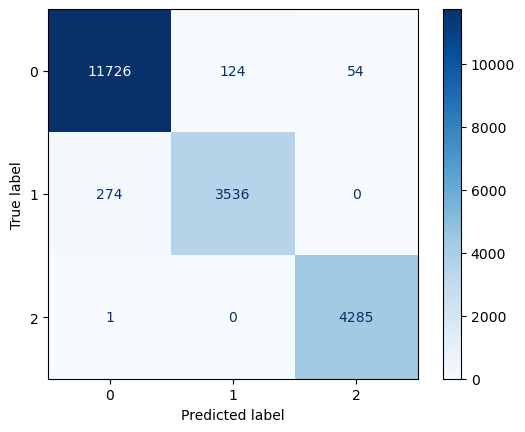

In [26]:
# Confusion matrix for Random Forest - base model
y_test_pred = base_model_rf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

In [27]:
# Classification report for Random Forest - base model
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11904
           1       0.97      0.93      0.95      3810
           2       0.99      1.00      0.99      4286

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



In [28]:
# Calculate the classification report for the training data
y_train_pred = base_model_rf.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47541
           1       1.00      1.00      1.00     15151
           2       1.00      1.00      1.00     17307

    accuracy                           1.00     79999
   macro avg       1.00      1.00      1.00     79999
weighted avg       1.00      1.00      1.00     79999



Error analysis for **Random Forest**:
- Even with a base model, the performance is excellent, as indicated by an accuracy > 0.95 across all classes
- In detail, most misclassifications occur between galaxies and quasars, likely due to overlapping feature distributions between these two categories
- This suggest that the model still struggles with localized errors that occur when features are less discriminative
- In addition, the model correctly classify the whole training dataset causing overfitting

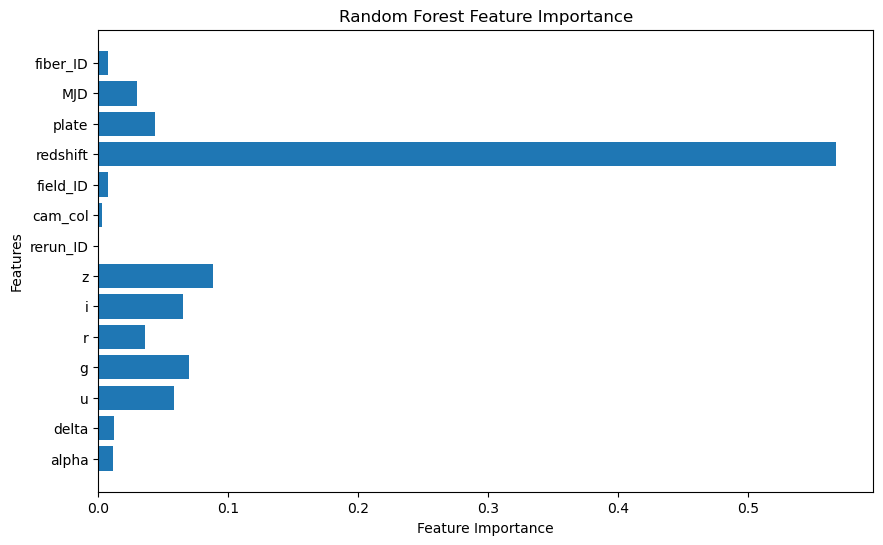

In [29]:
feature_importances = base_model_rf.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

The features redshift, z, and g are most important in the model. In contrast, the features like cam_col, field_ID, and fiber_ID are metadata that contribute little to the model, which could be dropped to simplify it

##### 3.4.3. K-Nearest Neighbor

In [30]:
# Defining and training the model:
base_model_knn = KNeighborsClassifier()
base_model_knn.fit(X_train, y_train)

KNeighborsClassifier()

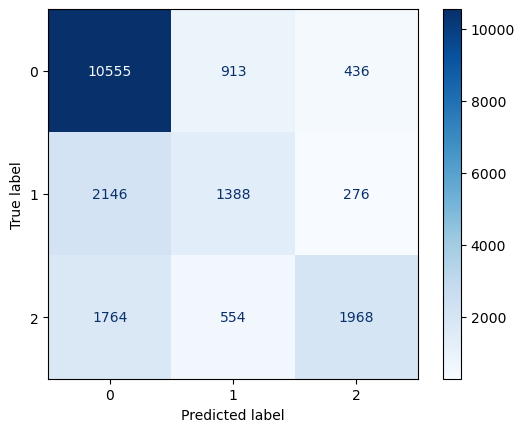

In [31]:
# Confusion matrix for KNN - base model
y_test_pred = base_model_knn.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

In [32]:
# Classification report for KNN - base model
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80     11904
           1       0.49      0.36      0.42      3810
           2       0.73      0.46      0.57      4286

    accuracy                           0.70     20000
   macro avg       0.65      0.57      0.59     20000
weighted avg       0.68      0.70      0.68     20000



Error analysis for **KNN**:
- The model achieves moderate accuracy but performs inconsistently across classes, particularly low on the minority class
- A significant portion of quasars and stars are misclassified as galaxies
- However, unlike random forest, KNN error seems to be more random and depend on the local distribution of data points

#### 3.5 Standardization and Resampling

Since machine learning models do not perform well with features on different scales and imbalanced classes, our initial approach is to apply **standardization** and **resampling** to address these issues. For resampling, we choose the **undersampling** method because our dataset is large, and the majority class contains enough samples to mitigate the risk of losing critical information.

We will apply standardization and resampling to **Logistic Regression** and **KNN** to see if the performance metric increases or not

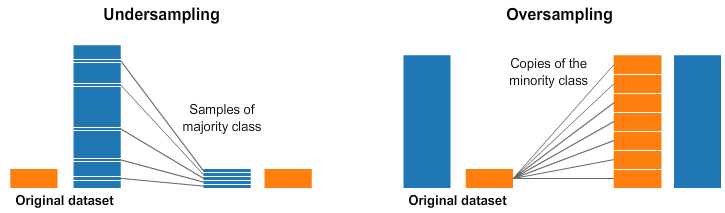

In [33]:
#run if need install imblearn
#!pip3 install imblearn

In [34]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

##### 3.5.1 Logistic Regression - Standardization and Resampling

In [35]:
# Define pipeline for standardization, undersampling and logistic regression model
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('rus', RandomUnderSampler(random_state=42)),
    ('logistic_regression', LogisticRegression(random_state = 42))
])
pipeline_lr.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('scaler', StandardScaler()),
                ('rus', RandomUnderSampler(random_state=42)),
                ('logistic_regression', LogisticRegression(random_state=42))])

Error analysis:
- The transformation significantly improves the performance of the logistic regression model
- The model now performs well across all three classes, especially with stars which the base model fails to classify

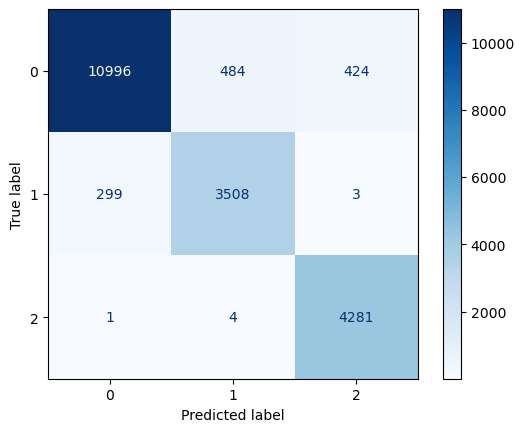

In [36]:
# Confusion matrix
y_pred = pipeline_lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

In [37]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95     11904
           1       0.88      0.92      0.90      3810
           2       0.91      1.00      0.95      4286

    accuracy                           0.94     20000
   macro avg       0.92      0.95      0.93     20000
weighted avg       0.94      0.94      0.94     20000



Feature importance:
- After applying standardization and undersampling, there is a significant shift in the coefficients
- Redshift now has the highest coefficient, perfectly align with the observation made in data analysis. u, g, and r also have relatively high positive coefficients
- Metadata like cam_col and fiber_ID remains to have smaller coefficients, suggesting their limited contribution to the classification 

In [38]:
feature_coefficients = pipeline_lr.named_steps['logistic_regression'].coef_
for(i, feature) in enumerate(features):
  print(f"{feature}: {feature_coefficients[0][i]}")

alpha: -0.0019565318239927014
delta: -0.0713642067747934
u: 0.14450458238310573
g: 0.9305895563257564
r: 0.2557451308339538
i: -1.1137221761347804
z: -0.04764213976827771
rerun_ID: 0.0
cam_col: -0.045736664278859175
field_ID: 0.023942428999985544
redshift: 14.141923325903205
plate: 0.8764415041451088
MJD: -0.9034359272195486
fiber_ID: -0.0023116910946853323


##### 3.5.2 Random Forest - Resampling

In [39]:
# Define pipeline for standardization and Resampling
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rus', RandomUnderSampler(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42))
])
pipeline_rf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rus', RandomUnderSampler(random_state=42)),
                ('rf', RandomForestClassifier(random_state=42))])

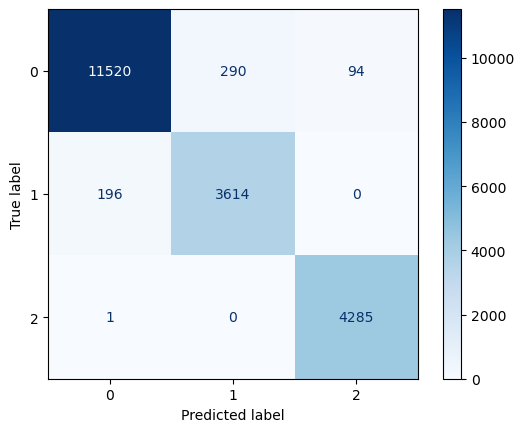

In [40]:
# Confusion matrix
y_pred = pipeline_rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

In [41]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     11904
           1       0.93      0.95      0.94      3810
           2       0.98      1.00      0.99      4286

    accuracy                           0.97     20000
   macro avg       0.96      0.97      0.97     20000
weighted avg       0.97      0.97      0.97     20000



The performance with standardization and undersampling is not as good as without them

##### 3.5.3 K-Nearest Neighbor - Standardization and Resampling

In [42]:
# Define pipeline for standardization and Resampling
pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('rus', RandomUnderSampler(random_state=42)),
    ('knn', KNeighborsClassifier())
])
pipeline_knn.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rus', RandomUnderSampler(random_state=42)),
                ('knn', KNeighborsClassifier())])

- KNN is sensitive to the scale of features, because it use the distance as the classifier, standardization led to significant improvements in model performance across all metrics
- Precision and recall for Galaxy and Star especially improved due to the more balanced and standardized data

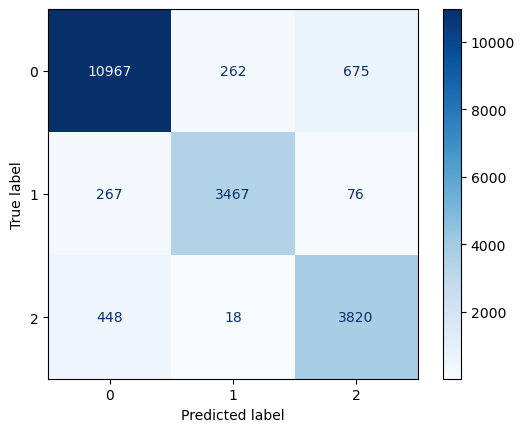

In [43]:
# Confusion matrix
y_pred = pipeline_knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

In [44]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     11904
           1       0.93      0.91      0.92      3810
           2       0.84      0.89      0.86      4286

    accuracy                           0.91     20000
   macro avg       0.90      0.91      0.90     20000
weighted avg       0.91      0.91      0.91     20000



#### 3.6 Standardization and PCA

In [45]:
from sklearn.decomposition import PCA

Before doing PCA, we decide to only use numerical features and remove highly correlated ones using correlation matrix

In [46]:
numerical_features = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']
X = star_df[numerical_features]

From the correlation matrix, we remove some highly correlated features

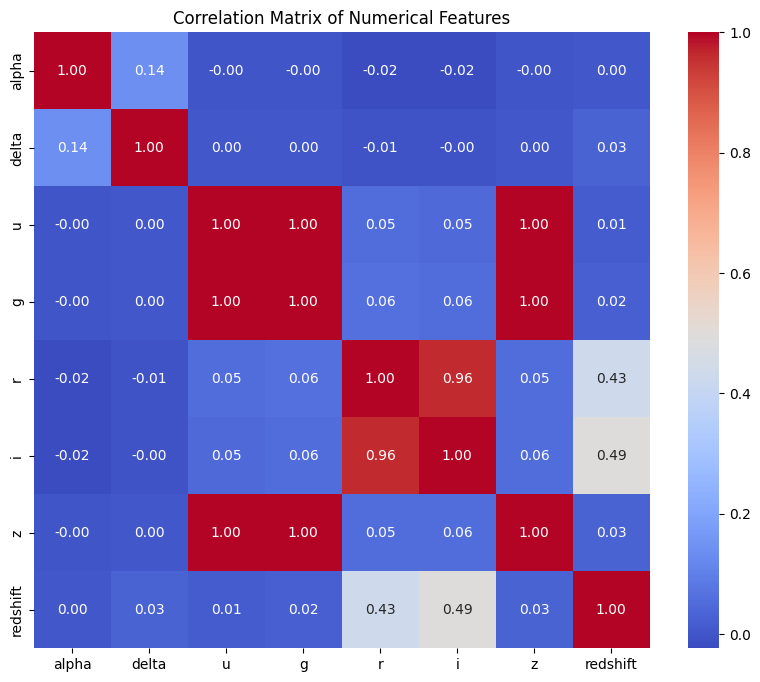

In [47]:
threshold = 0.8
high_correlation_pairs = []

# to find the most correlated correlation paires value
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature1 = correlation_matrix.columns[i]
            feature2 = correlation_matrix.columns[j]
            high_correlation_pairs.append((feature1, feature2, correlation_matrix.iloc[i, j]))

# print them
print("Highly correlated features (threshold > 0.8):")
for pair in high_correlation_pairs:
    print(f"{pair[0]} and {pair[1]}: Correlation = {pair[2]:.2f}")

Highly correlated features (threshold > 0.8):
g and u: Correlation = 1.00
i and r: Correlation = 0.96
z and u: Correlation = 1.00
z and g: Correlation = 1.00


We see that u, g, and z are highly correlated, so we deicide to remove z and g

Now we analyze the cummulative explained variance by PCA components. We decide to select 0.95 for the threshold to select the number of PCA components

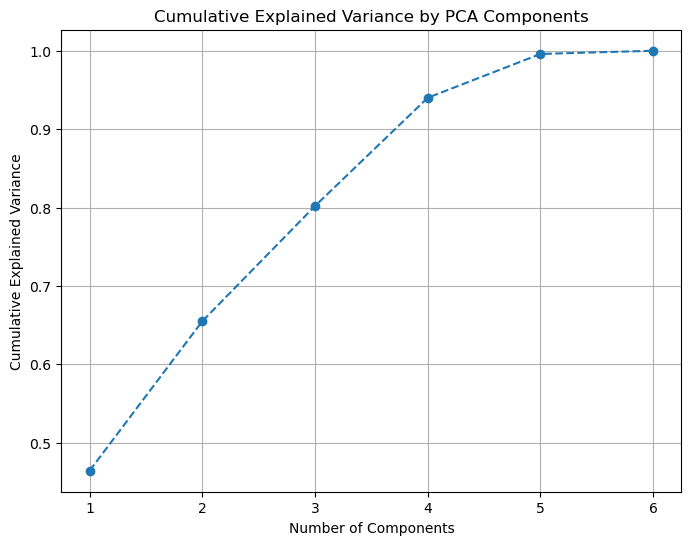

In [48]:
numerical_features = ['alpha', 'delta', 'u', 'r', 'i', 'redshift']
X = star_df[numerical_features].copy()
y = star_df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardization
sc = StandardScaler()
X_train_standardized = sc.fit_transform(X_train)
X_test_standardized =  sc.transform(X_test)
# PCA
pca = PCA() 
X_pca = pca.fit_transform(X_train_standardized)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()



In [49]:
# select the number of components with explained variance >= 0.95
threshold = 0.95
optimal_components = np.argmax(cumulative_variance >= threshold) + 1
print(f"Optimal number of components for 95% variance: {optimal_components}")

Optimal number of components for 95% variance: 5


Since 5 is the optimal number for the threshold, we select it

In [50]:
N_COMP = 5

pca = PCA(n_components=N_COMP)
train_xps = pca.fit_transform(X_train_standardized)
test_xps = pca.transform(X_test_standardized)

##### 3.6.1 Logistic Regression - PCA

In [51]:
pca_model_lr = LogisticRegression(random_state=42)
pca_model_lr.fit(train_xps, y_train)

LogisticRegression(random_state=42)

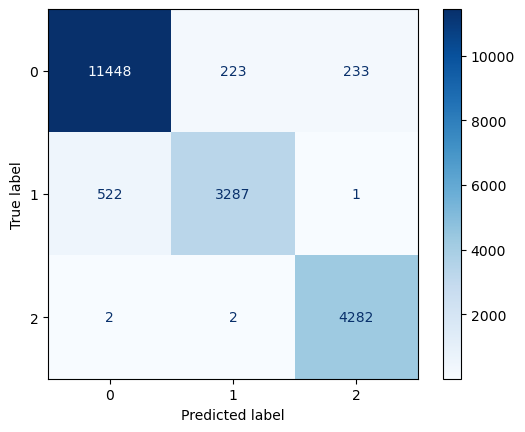

In [52]:
# Confusion matrix for Logistic Regression - PCA
y_test_pred = pca_model_lr.predict(test_xps)
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

In [53]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     11904
           1       0.94      0.86      0.90      3810
           2       0.95      1.00      0.97      4286

    accuracy                           0.95     20000
   macro avg       0.95      0.94      0.94     20000
weighted avg       0.95      0.95      0.95     20000



In [54]:
y_train_pred = pca_model_lr.predict(train_xps)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     47541
           1       0.94      0.87      0.90     15151
           2       0.95      1.00      0.97     17307

    accuracy                           0.95     79999
   macro avg       0.95      0.94      0.95     79999
weighted avg       0.95      0.95      0.95     79999



The train and test accuracy are very close, indicating a well-balanced model. It generalizes well without signs of overfitting or underfitting.

##### 3.6.2 K-Nearest Neighbor - PCA

In [55]:
pca_model_knn = KNeighborsClassifier()
pca_model_knn.fit(train_xps, y_train)

KNeighborsClassifier()

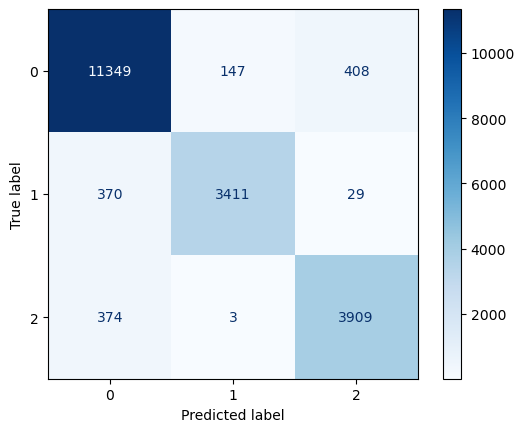

In [56]:
y_test_pred = pca_model_knn.predict(test_xps)
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

In [57]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     11904
           1       0.96      0.90      0.93      3810
           2       0.90      0.91      0.91      4286

    accuracy                           0.93     20000
   macro avg       0.93      0.92      0.93     20000
weighted avg       0.93      0.93      0.93     20000



In [58]:
y_train_pred = pca_model_knn.predict(train_xps)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     47541
           1       0.97      0.91      0.94     15151
           2       0.92      0.95      0.93     17307

    accuracy                           0.95     79999
   macro avg       0.95      0.94      0.94     79999
weighted avg       0.95      0.95      0.95     79999



The train and test accuracies are reasonably close, but the test accuracy is slightly lower. This suggests that the model might not fully capture all patterns in the data and could slightly overfit.

##### 3.6.3 Random Forest - PCA

In [59]:
pca_model_rf = RandomForestClassifier(random_state=42)
pca_model_rf.fit(train_xps, y_train)

RandomForestClassifier(random_state=42)

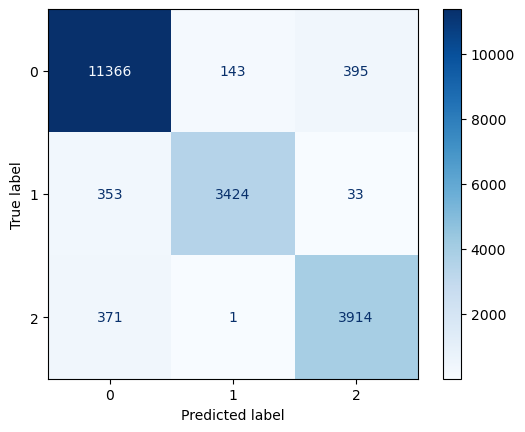

In [60]:
# Confusion matrix for Logistic Regression - PCA
y_test_pred = pca_model_rf.predict(test_xps)
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

In [61]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     11904
           1       0.96      0.90      0.93      3810
           2       0.90      0.91      0.91      4286

    accuracy                           0.94     20000
   macro avg       0.93      0.92      0.93     20000
weighted avg       0.94      0.94      0.94     20000



In [62]:
y_train_pred = pca_model_rf.predict(train_xps)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47541
           1       1.00      1.00      1.00     15151
           2       1.00      1.00      1.00     17307

    accuracy                           1.00     79999
   macro avg       1.00      1.00      1.00     79999
weighted avg       1.00      1.00      1.00     79999



The train accuracy is perfect, but the test accuracy is significantly lower. It may be a little bit underfitting. But there scores are both high, so normally there aren't overfitting and underfitting.

Hyperparameter tuning methods like GridSearchCV and RandomizedSearchCV often require substantial memory and computational resources, especially for large datasets or complex models. To reduce memory and storage requirements, we consider the following lightweight tuning methods: Optuna (Bayesian Optimization) and Successive Halving (HalvingGridSearchCV or HalvingRandomSearchCV) : but it still uses too many memory.(up to 4 GB) . Here we left the code in the comments.

**GridSearch for hyperparameter**

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'min_samples_split': [5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']
}

random_forest_model_hyper = RandomForestClassifier()

grid_search_rf = GridSearchCV(random_forest_model_hyper, param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_rf.fit(train_xps, y_train)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best CV Score:", grid_search_rf.best_score_)

optimized_random_forest = grid_search_rf.best_estimator_
optimized_random_forest.fit(train_xps, y_train)

random_forest_predictions = optimized_random_forest.predict(test_xps)
train_acc_rf = accuracy_score(y_train, optimized_random_forest.predict(train_xps))
test_acc_rf = accuracy_score(y_test, random_forest_predictions)

print(f"Random Forest - Train Accuracy: {train_acc_rf:.4f}, Test Accuracy: {test_acc_rf:.4f}")

#### 3.7 Kernel Density Estimation (KDE) and Kullback-Leibler divergence

In [63]:
id_columns = [col for col in star_df.columns if 'id' in col.lower()]
KDEfeatures = [col for col in features if col not in id_columns]
scaler = StandardScaler()
stX_train = scaler.fit_transform(train_df.drop(columns=id_columns)[KDEfeatures].values)
stX_test = scaler.transform(test_df.drop(columns=id_columns)[KDEfeatures].values)
dfX_train = pd.DataFrame(stX_train, columns=KDEfeatures)
dfX_test = pd.DataFrame(stX_test, columns=KDEfeatures)
idlabel = {0: 'Galaxy', 1: 'QSO', 2: 'Star'}
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

print(np.unique(y_train_encoded))
print("Dimensions of X_train :", dfX_train.shape)
print("Dimensions of y_train :", y_train.shape)
print("Dimensions of X_test :", dfX_test.shape)
print("Dimensions of y_test :", y_test.shape)

[0 1 2]
Dimensions of X_train : (79999, 11)
Dimensions of y_train : (79999,)
Dimensions of X_test : (20000, 11)
Dimensions of y_test : (20000,)


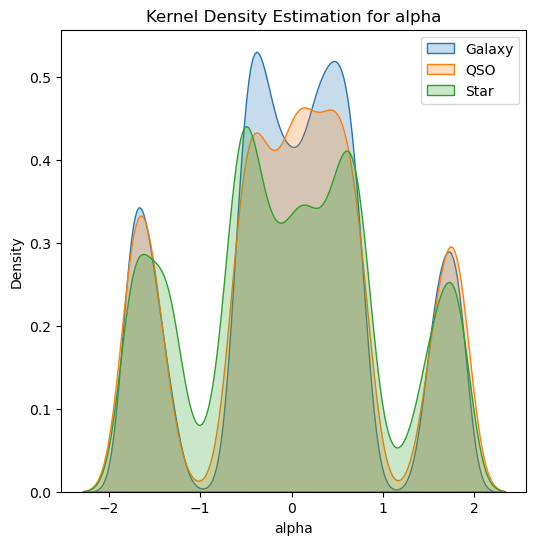

In [64]:
# Feature to plot (e.g., 'alpha')
feature_to_plot = 'alpha'


plt.figure(figsize=(6, 6))

for class_id, class_name in idlabel.items():
    # Ensure proper boolean indexing
    class_data = dfX_train[y_train_encoded == class_id][feature_to_plot]
    sns.kdeplot(data=class_data, fill=True, label=class_name)

plt.legend()
plt.title(f'Kernel Density Estimation for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.show()

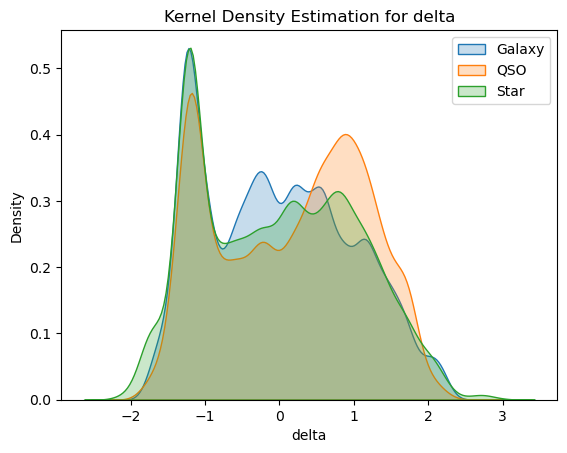

In [65]:
feature_to_plot = 'delta'
for class_id, class_name in idlabel.items():
    class_data = dfX_train[y_train_encoded == class_id][feature_to_plot]
    sns.kdeplot(data=class_data, fill=True, label=class_name)
plt.title(f'Kernel Density Estimation for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.legend()

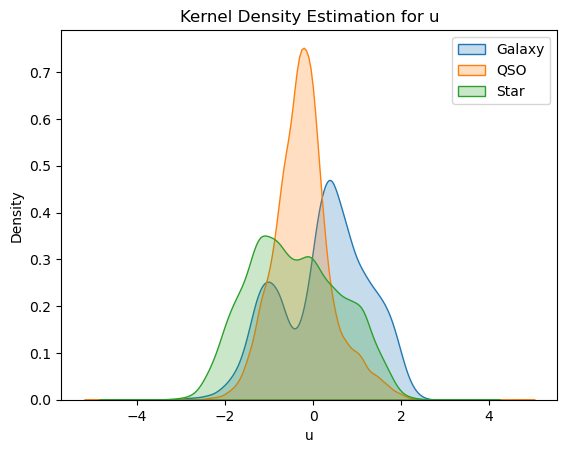

In [66]:
feature_to_plot = 'u'
for class_id, class_name in idlabel.items():
    class_data = dfX_train[y_train_encoded == class_id][feature_to_plot]
    sns.kdeplot(data=class_data, fill=True, label=class_name)
plt.title(f'Kernel Density Estimation for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.legend()

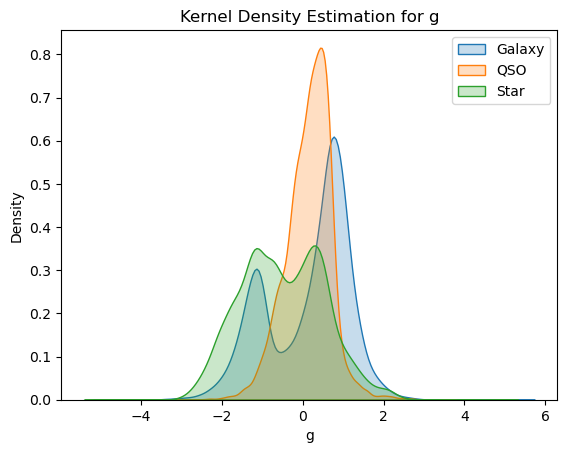

In [67]:
feature_to_plot = 'g'
for class_id, class_name in idlabel.items():
    class_data = dfX_train[y_train_encoded == class_id][feature_to_plot]
    sns.kdeplot(data=class_data, fill=True, label=class_name)
plt.title(f'Kernel Density Estimation for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.legend()

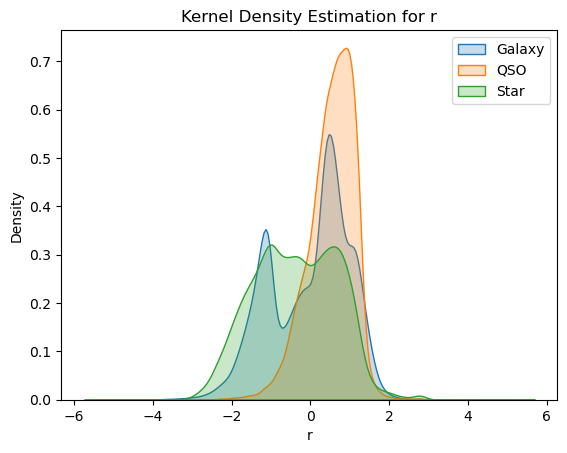

In [68]:
feature_to_plot = 'r'
for class_id, class_name in idlabel.items():
    class_data = dfX_train[y_train_encoded == class_id][feature_to_plot]
    sns.kdeplot(data=class_data, fill=True, label=class_name)
plt.title(f'Kernel Density Estimation for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.legend()

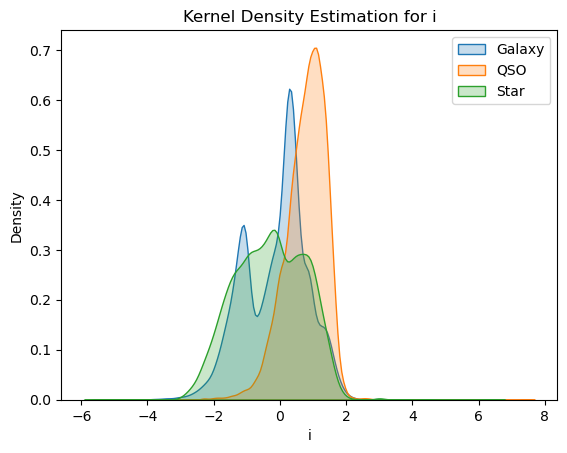

In [69]:
feature_to_plot = 'i'
for class_id, class_name in idlabel.items():
    class_data = dfX_train[y_train_encoded == class_id][feature_to_plot]
    sns.kdeplot(data=class_data, fill=True, label=class_name)
plt.title(f'Kernel Density Estimation for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.legend()

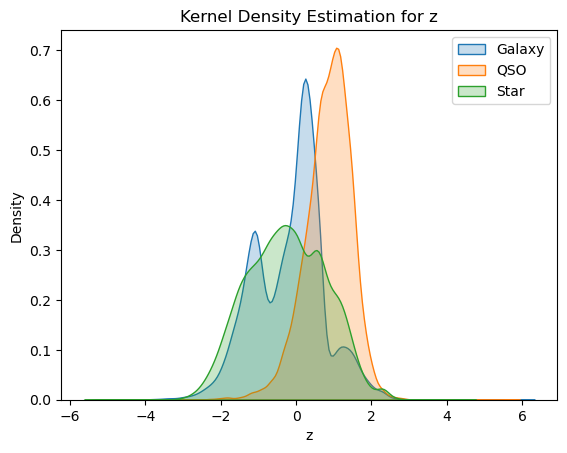

In [70]:
feature_to_plot = 'z'
for class_id, class_name in idlabel.items():
    class_data = dfX_train[y_train_encoded == class_id][feature_to_plot]
    sns.kdeplot(data=class_data, fill=True, label=class_name)
plt.title(f'Kernel Density Estimation for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.legend()

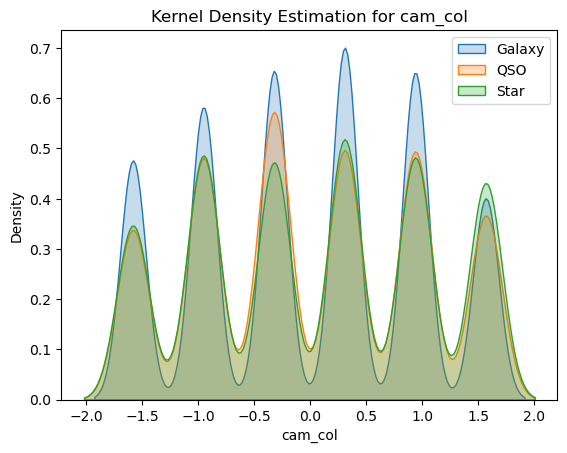

In [71]:
feature_to_plot = 'cam_col'
for class_id, class_name in idlabel.items():
    class_data = dfX_train[y_train_encoded == class_id][feature_to_plot]
    sns.kdeplot(data=class_data, fill=True, label=class_name)
plt.title(f'Kernel Density Estimation for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.legend()

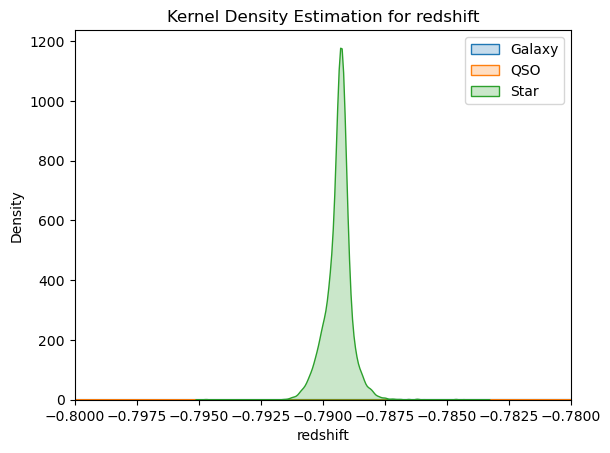

In [72]:
feature_to_plot = 'redshift'
for class_id, class_name in idlabel.items():
    class_data = dfX_train[y_train_encoded == class_id][feature_to_plot]
    sns.kdeplot(data=class_data, fill=True, label=class_name)
plt.title(f'Kernel Density Estimation for {feature_to_plot}')
plt.xlim(-0.8, -0.78)
plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.legend()

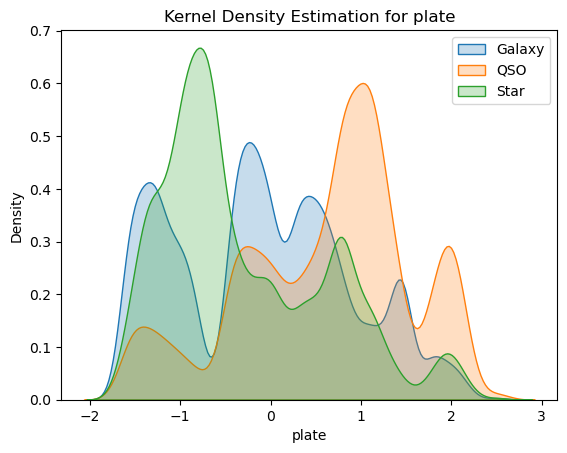

In [73]:
feature_to_plot = 'plate'
for class_id, class_name in idlabel.items():
    class_data = dfX_train[y_train_encoded == class_id][feature_to_plot]
    sns.kdeplot(data=class_data, fill=True, label=class_name)
plt.title(f'Kernel Density Estimation for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.legend()

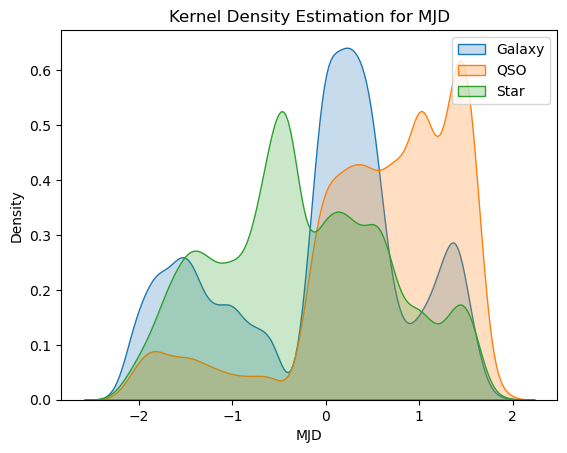

In [74]:
feature_to_plot = 'MJD'
for class_id, class_name in idlabel.items():
    class_data = dfX_train[y_train_encoded == class_id][feature_to_plot]
    sns.kdeplot(data=class_data, fill=True, label=class_name)
plt.title(f'Kernel Density Estimation for {feature_to_plot}')
plt.xlabel(feature_to_plot)
plt.ylabel('Density')
plt.legend()

The Kernel Density Estimation of alpha, delta and cam_col are too coincide, there are a overlipping. So i decided to reject them.  
Now we have u, g, r, i, z, redshift, plate and MJD.

Now, we calculate the **Kullback-Leibler divergence** between KDEs of different classes with a fixed x range to help the selection of features.

In [75]:
from scipy.stats import entropy
def kde_difference_kl_fixed_range(feature, X_train, y_train_encoded, classes, x_range=None):
    """
    Calculate the Kullback-Leibler divergence between KDEs of different classes with a fixed x range.
    """
    # Define a fixed x range if not provided
    if x_range is None:
        feature_min = X_train[feature].min()
        feature_max = X_train[feature].max()
        x_range = np.linspace(feature_min, feature_max, 1000)  # Common x range

    # Compute KDE curves for each class
    kde_curves = {}
    for class_id in range(len(classes)):
        class_data = X_train[y_train_encoded == class_id][feature]
        kde = sns.kdeplot(class_data, fill=False, warn_singular=False)
        y_values = np.interp(x_range, kde.get_lines()[0].get_xdata(), kde.get_lines()[0].get_ydata())
        kde_curves[class_id] = y_values
        plt.close()  # Prevent plotting

    # Compute KL divergence between classes
    kl_results = {}
    for i in range(len(classes)):
        for j in range(i + 1, len(classes)):
            p = kde_curves[i]
            q = kde_curves[j]
            kl_divergence = entropy(p, q)  # KL divergence
            kl_results[f'{classes[i]} vs {classes[j]}'] = kl_divergence

    return kl_results

In [76]:
kl_results_all = {}

# Calculate KL divergences for each feature
for feature in dfX_train.columns:
    x_range = np.linspace(dfX_train[feature].min(), dfX_train[feature].max(), 1000)
    kl_results_all[feature] = kde_difference_kl_fixed_range(feature, dfX_train, y_train_encoded, ['Galaxy', 'QSO', 'Star'], x_range)

# Convert the results into a DataFrame
kl_table = pd.DataFrame(kl_results_all).T
kl_table.columns = [f'{pair}' for pair in kl_table.columns]
kl_table.index.name = 'Feature'

# Display the table
print(kl_table)

          Galaxy vs QSO  Galaxy vs Star  QSO vs Star
Feature                                             
alpha          0.012348        0.085953     0.053318
delta          0.041668        0.020646     0.035908
u              0.478794        0.219053     0.292605
g              0.639838        0.306382     0.458487
r              0.567771        0.104533     0.541463
i              0.881245        0.090954     0.648737
z              1.114546        0.102208     0.704451
cam_col        0.045778        0.048819     0.004976
redshift       2.007415        2.097926     0.854596
plate          0.319849        0.241646     0.523423
MJD            0.295899        0.207446     0.520857


Then after calculate the Kullback-Leibler divergence between KDEs of different classes with a fixed x range.  
It verifie the rejection we decided before. 

In [77]:
# List of columns to keep
features_to_keep = ['u', 'g', 'r', 'i', 'z', 'redshift', 'plate', 'MJD']

X_train_filtered = dfX_train[features_to_keep]
X_test_filtered = dfX_test[features_to_keep]

label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

print("Colonnes restantes :")
print(X_train_filtered.columns)

print("Dimensions of X_train :", X_train_filtered.shape)
print("Dimensions of y_train :", y_train_encoded.shape)
print("Dimensions of X_test :", X_test_filtered.shape)
print("Dimensions of y_test :", y_test_encoded.shape)

Colonnes restantes :
Index(['u', 'g', 'r', 'i', 'z', 'redshift', 'plate', 'MJD'], dtype='object')
Dimensions of X_train : (79999, 8)
Dimensions of y_train : (79999,)
Dimensions of X_test : (20000, 8)
Dimensions of y_test : (20000,)


##### 3.7.1 Logistic Regression - KDE and Divergence

In [78]:
#logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train_filtered, y_train_encoded)
lr_predict = lr_model.predict(X_test_filtered)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


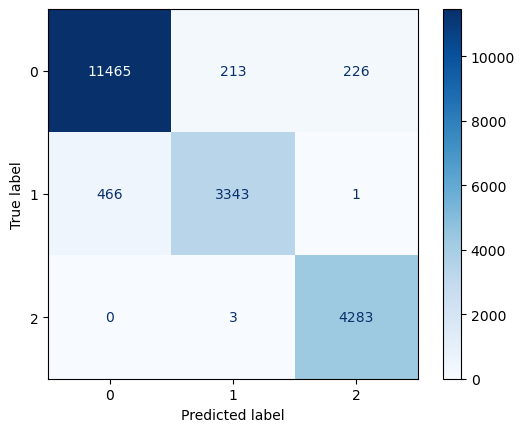

In [79]:
cm = confusion_matrix(y_test_encoded, lr_predict)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

In [80]:
print(classification_report(y_test_encoded, lr_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     11904
           1       0.94      0.88      0.91      3810
           2       0.95      1.00      0.97      4286

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [81]:
print(classification_report(y_train_encoded, lr_model.predict(X_train_filtered)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     47541
           1       0.95      0.88      0.91     15151
           2       0.95      1.00      0.97     17307

    accuracy                           0.96     79999
   macro avg       0.95      0.95      0.95     79999
weighted avg       0.96      0.96      0.96     79999



The train and test accuracies are closed but still a bit difference, there are not overfitting and underfitting.

##### 3.7.2 Random Forest - KDE and Divergence

In [82]:
#Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_filtered, y_train_encoded)
rf_predict = rf_model.predict(X_test_filtered)

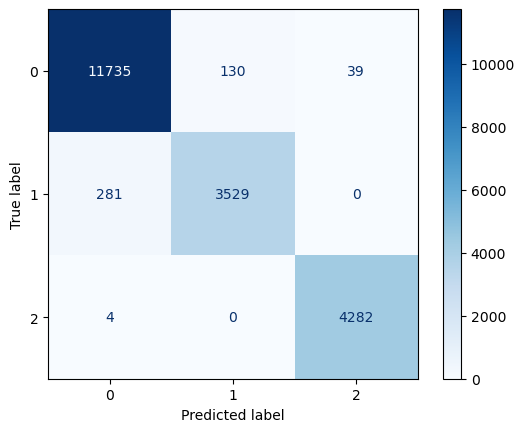

In [83]:
cm = confusion_matrix(y_test_encoded, rf_predict)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

In [84]:
print(classification_report(y_test_encoded, rf_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11904
           1       0.96      0.93      0.94      3810
           2       0.99      1.00      1.00      4286

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000



In [85]:
print(classification_report(y_train_encoded, rf_model.predict(X_train_filtered)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47541
           1       1.00      1.00      1.00     15151
           2       1.00      1.00      1.00     17307

    accuracy                           1.00     79999
   macro avg       1.00      1.00      1.00     79999
weighted avg       1.00      1.00      1.00     79999



The train and test result are very weel, train with 1 for accuracy makes a risque of overfitting.

##### 3.7.3 K-Nearest Neighbor - KDE and Divergence

In [86]:
# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_filtered, y_train_encoded)
knn_predict = knn_model.predict(X_test_filtered)

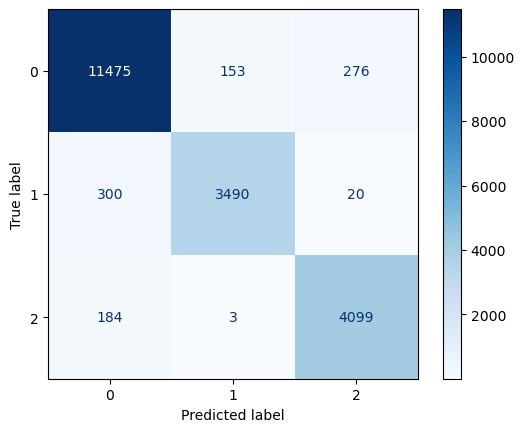

In [87]:
cm = confusion_matrix(y_test_encoded, knn_predict)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

In [88]:
print(classification_report(y_test_encoded, knn_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     11904
           1       0.96      0.92      0.94      3810
           2       0.93      0.96      0.94      4286

    accuracy                           0.95     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.95      0.95     20000



In [89]:
print(classification_report(y_train_encoded, knn_model.predict(X_train_filtered)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     47541
           1       0.97      0.94      0.95     15151
           2       0.95      0.97      0.96     17307

    accuracy                           0.97     79999
   macro avg       0.96      0.96      0.96     79999
weighted avg       0.97      0.97      0.97     79999



Their score are good. There are no overfitting and underfitting.

We have try for 'alpha' and 'delta' before (in KDE part) that its **combination** may works for Galaxy. Here is what i have tried. 

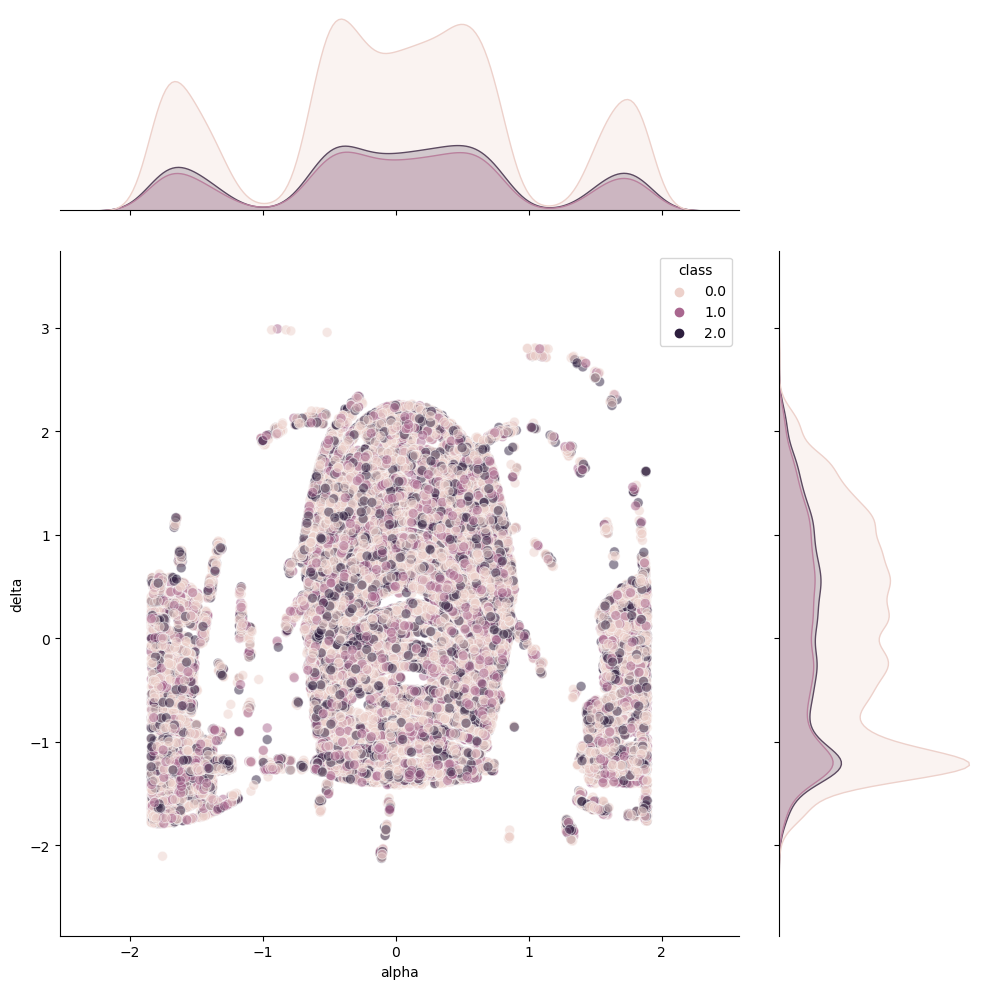

In [90]:
sns.jointplot(data=dfX_train, x='alpha', y='delta', hue=y_train, s=50, alpha=0.5, height=10, ratio=3);

In [91]:
X_train_filtered = X_train_filtered.copy()
X_test_filtered = X_test_filtered.copy()
X_train_filtered['AD'] = dfX_train['alpha'] * dfX_train['delta']
X_test_filtered['AD'] = dfX_test['alpha'] * dfX_test['delta']

In [92]:
print(X_train_filtered.head())

          u         g         r         i         z  redshift     plate  \
0  0.214661  0.814879  0.262740  0.168279  0.028121 -0.257346  0.684174   
1  1.630152  1.422765  1.267335  0.982283  0.613604  0.432463  0.771209   
2  1.786991  0.562897  0.364565  0.228321  0.176186 -0.136207  0.303864   
3 -0.807648 -1.028494 -1.112608 -1.089694 -1.083926 -0.640238 -1.077850   
4 -0.018128  0.409832  0.907404  1.239121  1.359245 -0.790643 -0.434066   

        MJD        AD  
0  0.750857  2.585252  
1  0.641436  0.230486  
2  0.284988  0.703875  
3 -1.232542 -0.126207  
4 -0.176461  0.226867  


In [93]:
features_to_keep = ['AD', 'u', 'g', 'r', 'i', 'z', 'redshift', 'plate', 'MJD']

X_train_filtered = X_train_filtered[features_to_keep]
X_test_filtered = X_test_filtered[features_to_keep]

There are some NaN due to its new feature, so i replaced it by "mean" values.

In [94]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
X_train_filtered = pd.DataFrame(imputer.fit_transform(X_train_filtered), columns=features_to_keep)
X_test_filtered = pd.DataFrame(imputer.transform(X_test_filtered), columns=features_to_keep)

In [95]:
#logistic regression
lr_model = LogisticRegression()
lr_model.fit(X_train_filtered, y_train_encoded)
lr_predict = lr_model.predict(X_test_filtered)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


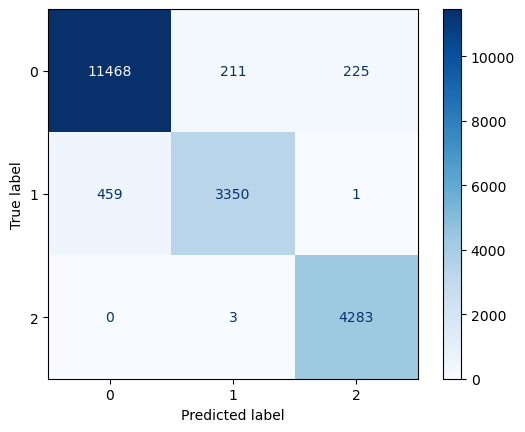

In [96]:
cm = confusion_matrix(y_test_encoded, lr_predict)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

In [97]:
print(classification_report(y_test_encoded, lr_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     11904
           1       0.94      0.88      0.91      3810
           2       0.95      1.00      0.97      4286

    accuracy                           0.96     20000
   macro avg       0.95      0.95      0.95     20000
weighted avg       0.95      0.96      0.95     20000



In [98]:
print(classification_report(y_train_encoded, lr_model.predict(X_train_filtered)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     47541
           1       0.95      0.88      0.92     15151
           2       0.95      1.00      0.97     17307

    accuracy                           0.96     79999
   macro avg       0.95      0.95      0.95     79999
weighted avg       0.96      0.96      0.96     79999



The scores for training and testing are the same and their scores can be considered high, so it is neither overfitting nor underfitting.

In [99]:
#Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_filtered, y_train_encoded)
rf_predict = rf_model.predict(X_test_filtered)

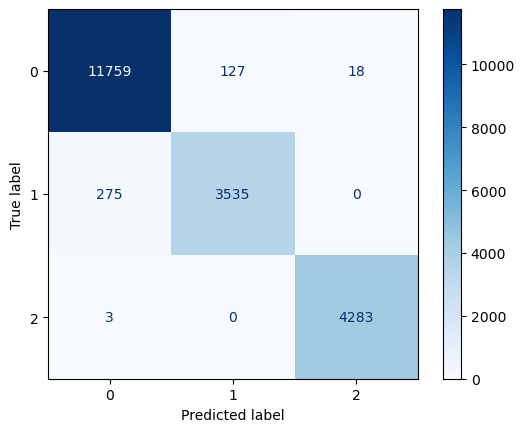

In [100]:
cm = confusion_matrix(y_test_encoded, rf_predict)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

In [101]:
print(classification_report(y_test_encoded, rf_predict))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11904
           1       0.97      0.93      0.95      3810
           2       1.00      1.00      1.00      4286

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000



In [102]:
print(classification_report(y_train_encoded, rf_model.predict(X_train_filtered)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47541
           1       1.00      1.00      1.00     15151
           2       1.00      1.00      1.00     17307

    accuracy                           1.00     79999
   macro avg       1.00      1.00      1.00     79999
weighted avg       1.00      1.00      1.00     79999



It works very well but train has 1 for accuracy, it has a risque of overfitting.

In [103]:
# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_filtered, y_train_encoded)
knn_predict = knn_model.predict(X_test_filtered)

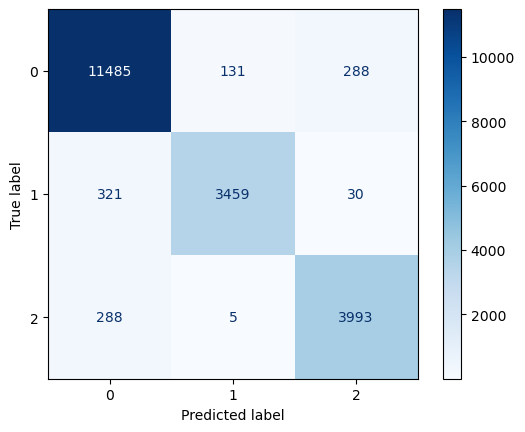

In [104]:
cm = confusion_matrix(y_test_encoded, knn_predict)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')

In [105]:
print(classification_report(y_test_encoded, knn_predict))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     11904
           1       0.96      0.91      0.93      3810
           2       0.93      0.93      0.93      4286

    accuracy                           0.95     20000
   macro avg       0.95      0.93      0.94     20000
weighted avg       0.95      0.95      0.95     20000



In [106]:
print(classification_report(y_train_encoded, knn_model.predict(X_train_filtered)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     47541
           1       0.97      0.93      0.95     15151
           2       0.94      0.95      0.95     17307

    accuracy                           0.96     79999
   macro avg       0.96      0.95      0.96     79999
weighted avg       0.96      0.96      0.96     79999



It works well, the training accuracy is slightly less than the test accuracy, but there is no overfitting or underfitting.

In comparison, this new feature makes the test results slightly better than without adding this new feature.

### 4. Evaluation

- Standardization performs very well in all cases
- The most effective selection method is Kernel Density Estimation (KDE) and Kullback-Leibler divergence
- For this problem, the most effective classifier in general is Random Forest, while the worst classifier (even though it works well here) is k_NN most of the time.
- After "resampling", "PCA", and "KDE + DL divergences + the newly created feature", the results are compared through classifier_report and confusion matrix. Each method produces good scores, but the last method has the highest scores and almost no risk of overfitting and underfitting. Therefore, the best features are ['AD', 'u', 'g', 'r', 'i', 'z', 'redshift', 'plate', 'MJD'] with "KDE + DL divergences + newly created feature" and "logistic regression".

### 5. Conclusion


After determining the common goal and evaluation method, the three of us each looked for different ways to classify.  
We used five classifiers at first, and then we determined the main three for the convenience of work : Logistic Regression, Random Forest and k_NN.  
We used various methods such as resampling, dimensionality reduction, density calculation, and creation of new features, and they all brought good results. In the same time, we analyzed their overfitting and underfitting for the results.  
We also tried to use the grid to find the best hyperparameters to improve our models, but due to insufficient memory, we were unable to run this part successfully.  
If we had more time, we would choose to try more new features and continue to advance our grid search.